In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Soal 1

In [18]:
geyser = sns.load_dataset('geyser')

In [19]:
geyser.head()

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long


In [20]:
geyser.isnull().sum()

duration    0
waiting     0
kind        0
dtype: int64

In [21]:
geyser.groupby('kind').count()

,duration,waiting
kind,,
long,172,172
short,100,100


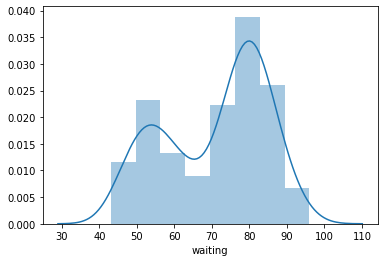

In [22]:
sns.distplot(geyser['waiting'])

In [32]:
wall = geyser['waiting']
wlong = geyser[geyser['kind'] == 'long']['waiting']
wshort = geyser[geyser['kind'] == 'short']['waiting']

In [33]:
from scipy.stats import kstest
kstest(wall,'norm')
# alpha = 0.05
# pvalue = 0.0
# pvalue < alpha = H0 ditolak = bukan normal

KstestResult(statistic=1.0, pvalue=0.0)

In [35]:
from scipy.stats import mannwhitneyu
mannwhitneyu(wlong,wshort)
# alpha = 0.05
# pvalue = 2.4045985588400326e-43
# pvalue < alpha = H0 ditolak = terdapat minimal 1 perbedaan

MannwhitneyuResult(statistic=0.0, pvalue=2.4045985588400326e-43)

## Soal 2

In [66]:
ds2 = pd.DataFrame(index=np.arange(0,1500),columns='int num norm root cat'.split())
ds2.head()

,int,num,norm,root,cat
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [67]:
randint = np.random.randint(1,101,1500)
ds2['int'] = randint

In [68]:
rand = np.random.rand(1500)
ds2['num'] = rand

In [69]:
randn = np.random.randn(1500)
ds2['norm'] = randn

In [71]:
import math
akar = list()
for i in ds2['int']:
    akar.append(math.sqrt(i))
ds2['root'] = akar

In [73]:
randkat = list()
kat = ['Rendah','Sedang','Tinggi']
import random
for i in range(0,1500):
    randkat.append(random.choice(kat))
ds2['cat'] = randkat

In [74]:
ds2

,int,num,norm,root,cat
0,38,0.198611,0.557780,6.164414,Tinggi
1,59,0.749148,0.155634,7.681146,Tinggi
2,60,0.953719,0.485310,7.745967,Rendah
3,69,0.867767,0.123989,8.306624,Tinggi
4,91,0.698526,1.167163,9.539392,Tinggi
...,...,...,...,...,...
1495,89,0.529578,0.051299,9.433981,Tinggi
1496,99,0.270112,-1.118429,9.949874,Sedang
1497,32,0.984575,0.697273,5.656854,Tinggi
1498,80,0.458819,-0.411707,8.944272,Tinggi


In [75]:
# rumus slovin
populasi = len(ds2.index)
sampel = (populasi // (1 + (populasi * (0.05 ** 2))))
sampel

315.0